This notebook was tested from a GFDL workstation.
This notebook is an example of using catalog builder from a notebook to generate data catalogs, a.k.a intake-esm catalogs.

How to get here? 

Login to your workstation at GFDL.
module load python/3.9
conda activate intakebuilder 
(For the above: Note that you can either install your own environment using the following or use an existing environment such as this: conda activate /nbhome/Aparna.Radhakrishnan/conda/envs/intakebuilder )

conda create -n intakebuilder 
conda install intakebuilder -c noaa-gfdl -n intakebuilder

Now, we do a couple of things to make sure your environment is available to jupyter-lab as a kernel.

pip install ipykernel 
python -m ipykernel install --user --name=intakebuilder

Now, start a jupyter-lab session from GFDL workstation: 

jupyter-lab 

This will give you the URL to the jupyter-lab session running on your localhost. Paste the URL in your web-browser (or via TigerVNC). Paste the notebook cells from this notebook, or locate the notebook from the path where you have downloaded or cloned it via git. Go to Kernel->Change Kernel-> Choose intakebuilder.

Run the notebook and see the results! Extend it and share it with us via a github issue. 


In [22]:
from scripts import gen_intake_gfdl
import sys,os

######USER input begins########

#User provides the input directory for which a data catalog needs to be generated.
#Note that depending on the date and version of the tool, only time-series data are catalogued.

input_path = "/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pdclim1850F/gfdl.ncrc5-deploy-prod-openmp/pp/"

#USER inputs the output path. Based on the following setting, user can expect to see /home/a1r/mycatalog.csv and /home/a1r/mycatalog.json generated as output.

output_path = "/home/a1r/mycatalog"

####END OF user input ##########
sys.argv = ['--INPUT_PATH', input_path, output_path]

try:
      gen_intake_gfdl.main()
except SystemExit as e:
    if e.code != 0:
        raise

Found existing file! Overwrite? (y/n) y


writing..
JSON generated at: /home/a1r/mycatalog.json
CSV generated at: /home/a1r/mycatalog.csv


Let's begin our analysis

In [49]:
import intake_esm, intake
import matplotlib #do a pip install of tools needed in your env or from the notebook
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [ ]:
pip install matplotlib

In [24]:
col_url = "/home/a1r/mycatalog.json"
col = intake.open_esm_datastore(col_url)

Explore the catalog

In [25]:
col.df

,activity_id,institution_id,source_id,experiment_id,frequency,modeling_realm,table_id,member_id,grid_label,variable_id,temporal_subset,chunk_freq,grid_label.1,platform,dimensions,cell_methods,path
0,dev,NaN,am5,c96L65_am5f3b1r0_pdclim1850F,3hr,atmos_cmip,NaN,NaN,NaN,pr,0002010100-0002123123,1yr,NaN,gfdl.ncrc5-deploy-prod-openmp,NaN,ts,/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pd...
1,dev,NaN,am5,c96L65_am5f3b1r0_pdclim1850F,3hr,atmos_cmip,NaN,NaN,NaN,rlut,0002010100-0002123123,1yr,NaN,gfdl.ncrc5-deploy-prod-openmp,NaN,ts,/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pd...
2,dev,NaN,am5,c96L65_am5f3b1r0_pdclim1850F,3hr,atmos_cmip,NaN,NaN,NaN,pr,0003010100-0003123123,1yr,NaN,gfdl.ncrc5-deploy-prod-openmp,NaN,ts,/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pd...
3,dev,NaN,am5,c96L65_am5f3b1r0_pdclim1850F,3hr,atmos_cmip,NaN,NaN,NaN,rlut,0003010100-0003123123,1yr,NaN,gfdl.ncrc5-deploy-prod-openmp,NaN,ts,/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pd...
4,dev,NaN,am5,c96L65_am5f3b1r0_pdclim1850F,3hr,atmos_cmip,NaN,NaN,NaN,pr,0004010100-0004123123,1yr,NaN,gfdl.ncrc5-deploy-prod-openmp,NaN,ts,/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pd...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405,dev,NaN,am5,c96L65_am5f3b1r0_pdclim1850F,monthly,land_cmip,NaN,NaN,NaN,treeFracNdlDcd,001001-001012,1yr,NaN,gfdl.ncrc5-deploy-prod-openmp,NaN,ts,/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pd...
6406,dev,NaN,am5,c96L65_am5f3b1r0_pdclim1850F,monthly,land_cmip,NaN,NaN,NaN,treeFracNdlEvg,001001-001012,1yr,NaN,gfdl.ncrc5-deploy-prod-openmp,NaN,ts,/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pd...
6407,dev,NaN,am5,c96L65_am5f3b1r0_pdclim1850F,monthly,land_cmip,NaN,NaN,NaN,tsl,001001-001012,1yr,NaN,gfdl.ncrc5-deploy-prod-openmp,NaN,ts,/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pd...
6408,dev,NaN,am5,c96L65_am5f3b1r0_pdclim1850F,monthly,land_cmip,NaN,NaN,NaN,vegFrac,001001-001012,1yr,NaN,gfdl.ncrc5-deploy-prod-openmp,NaN,ts,/archive/am5/am5/am5f3b1r0/c96L65_am5f3b1r0_pd...


Let's narrow down the search

In [26]:
expname_filter = ['c96L65_am5f3b1r0_pdclim1850F']
modeling_realm = "land_cmip"
frequency = "daily"

In [27]:
cat = col.search(experiment_id=expname_filter,frequency=frequency,modeling_realm=modeling_realm)

In [29]:
set(cat.df["variable_id"])

{'hflsLut', 'mrso', 'mrsos'}

In [36]:
cat = cat.search(variable_id="mrso") #Total Soil Moisture Content

dmget the files

In [37]:
#for simple dmget usage, just use this !dmget {file}
#use following to wrap the dmget call for each path in the catalog
def dmgetmagic(x):
    cmd = 'dmget %s'% str(x) 
    return os.system(cmd)

#OR refer to importing dmget ,  https://github.com/aradhakrishnanGFDL/canopy-cats/tree/main/notebooks/dmget.py

In [38]:
dmstatus = cat.df["path"].apply(dmgetmagic)

In [76]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time':5}, 'decode_times': True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'source_id.experiment_id.frequency.modeling_realm.variable_id.chunk_freq'


In [77]:
for k in dset_dict.keys(): 
    print(k)

am5.c96L65_am5f3b1r0_pdclim1850F.daily.land_cmip.mrso.1yr


In [78]:
ds = dset_dict["am5.c96L65_am5f3b1r0_pdclim1850F.daily.land_cmip.mrso.1yr"]

In [79]:
ds

<xarray.Dataset> Size: 757MB
Dimensions:     (time: 3650, bnds: 2, lat: 180, lon: 288)
Coordinates:
    average_DT  (time) timedelta64[ns] 29kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T1  (time) object 29kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) object 29kB dask.array<chunksize=(5,), meta=np.ndarray>
  * bnds        (bnds) float64 16B 1.0 2.0
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lat_bnds    (lat, bnds) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon         (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
    lon_bnds    (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time        (time) object 29kB 0002-01-01 12:00:00 ... 0011-12-31 12:00:00
    time_bnds   (time, bnds) object 58kB dask.array<chunksize=(5, 2), meta=np.ndarray>
Data variables:
    mrso        (time, lat, lon) float32 757MB dask.array<chunksize=(5, 180, 288), meta=np.ndarray>
Attributes: (12/18)
    title:                            c96L65_am5f3b1r0_pdclim1850F
    grid_type:                        regular
    grid_tile:                        N/A
    code_release_version:             2023.01
    git_hash:                         unknown githash
    external_variables:               land_area
    ...                               ...
    intake_esm_attrs:variable_id:     mrso
    intake_esm_attrs:chunk_freq:      1yr
    intake_esm_attrs:platform:        gfdl.ncrc5-deploy-prod-openmp
    intake_esm_attrs:cell_methods:    ts
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           am5.c96L65_am5f3b1r0_pdclim1850F.daily....

In [80]:
ds["mrso"]

<xarray.DataArray 'mrso' (time: 3650, lat: 180, lon: 288)> Size: 757MB
dask.array<concatenate, shape=(3650, 180, 288), dtype=float32, chunksize=(5, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    average_DT  (time) timedelta64[ns] 29kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T1  (time) object 29kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) object 29kB dask.array<chunksize=(5,), meta=np.ndarray>
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon         (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time        (time) object 29kB 0002-01-01 12:00:00 ... 0011-12-31 12:00:00
Attributes:
    units:            kg m-2
    long_name:        Total Soil Moisture Content
    cell_methods:     area: mean time: mean
    ocean_fillvalue:  0.0
    cell_measures:    area: land_area
    time_avg_info:    average_T1,average_T2,average_DT
    standard_name:    soil_moisture_content
    interp_method:    conserve_order1

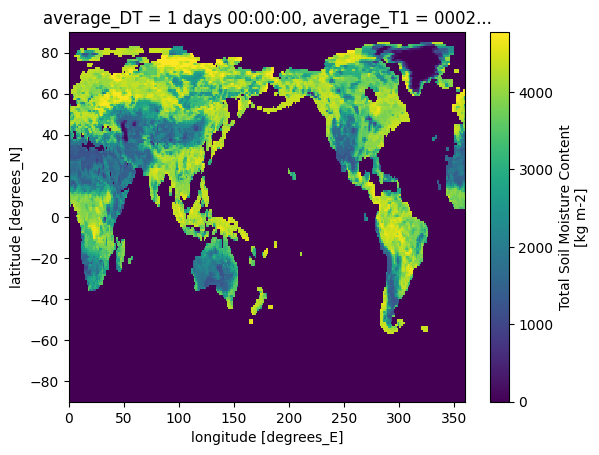

In [81]:
mrso = ds.mrso.isel(time=1).plot()

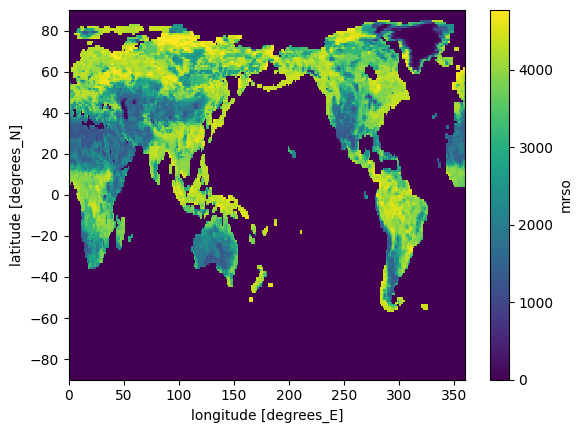

In [53]:
ds.mrso.mean(dim='time').plot()

In [60]:
cat.df['temporal_subset'] 

0    00020101-00021231
1    00030101-00031231
2    00040101-00041231
3    00050101-00051231
4    00060101-00061231
5    00070101-00071231
6    00080101-00081231
7    00090101-00091231
8    00110101-00111231
9    00100101-00101231
Name: temporal_subset, dtype: object

Can I please leverage CF?  

In [ ]:
pip install cf_xarray

#You may leverage the use of cf_xarray, xMIP etc to build your analyses from here. They all blend in.

In [69]:
import xarray as xr
import cf_xarray as cfxr

In [71]:
xr.decode_cf(ds)

<xarray.Dataset> Size: 757MB
Dimensions:     (time: 3650, bnds: 2, lat: 180, lon: 288)
Coordinates:
    average_DT  (time) timedelta64[ns] 29kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T1  (time) object 29kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) object 29kB dask.array<chunksize=(5,), meta=np.ndarray>
  * bnds        (bnds) float64 16B 1.0 2.0
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lat_bnds    (lat, bnds) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon         (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
    lon_bnds    (lon, bnds) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time        (time) object 29kB 0002-01-01 12:00:00 ... 0011-12-31 12:00:00
    time_bnds   (time, bnds) object 58kB dask.array<chunksize=(5, 2), meta=np.ndarray>
Data variables:
    mrso        (time, lat, lon) float32 757MB dask.array<chunksize=(5, 180, 288), meta=np.ndarray>
Attributes: (12/18)
    title:                            c96L65_am5f3b1r0_pdclim1850F
    grid_type:                        regular
    grid_tile:                        N/A
    code_release_version:             2023.01
    git_hash:                         unknown githash
    external_variables:               land_area
    ...                               ...
    intake_esm_attrs:variable_id:     mrso
    intake_esm_attrs:chunk_freq:      1yr
    intake_esm_attrs:platform:        gfdl.ncrc5-deploy-prod-openmp
    intake_esm_attrs:cell_methods:    ts
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           am5.c96L65_am5f3b1r0_pdclim1850F.daily....

In [74]:
ds.mrso.sel(time=slice("0002-01-01","0004-01-01"))

<xarray.DataArray 'mrso' (time: 0, lat: 180, lon: 288)> Size: 0B
dask.array<getitem, shape=(0, 180, 288), dtype=float32, chunksize=(0, 180, 288), chunktype=numpy.ndarray>
Coordinates:
    average_DT  (time) float64 0B dask.array<chunksize=(0,), meta=np.ndarray>
    average_T1  (time) float64 0B dask.array<chunksize=(0,), meta=np.ndarray>
    average_T2  (time) float64 0B dask.array<chunksize=(0,), meta=np.ndarray>
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon         (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time        (time) float64 0B 
Attributes:
    units:            kg m-2
    long_name:        Total Soil Moisture Content
    cell_methods:     area: mean time: mean
    ocean_fillvalue:  0.0
    cell_measures:    area: land_area
    time_avg_info:    average_T1,average_T2,average_DT
    standard_name:    soil_moisture_content
    interp_method:    conserve_order1

In [75]:
ds.mrso.time

<xarray.DataArray 'time' (time: 3650)> Size: 29kB
array([ 365.5,  366.5,  367.5, ..., 4012.5, 4013.5, 4014.5])
Coordinates:
    average_DT  (time) float64 29kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T1  (time) float64 29kB dask.array<chunksize=(5,), meta=np.ndarray>
    average_T2  (time) float64 29kB dask.array<chunksize=(5,), meta=np.ndarray>
  * time        (time) float64 29kB 365.5 366.5 367.5 ... 4.014e+03 4.014e+03
Attributes:
    units:          days since 0001-01-01 00:00:00
    long_name:      time
    axis:           T
    calendar_type:  NOLEAP
    calendar:       noleap
    bounds:         time_bnds
    cell_methods:   time: mean